<a href="https://colab.research.google.com/github/FathimaNourinDS/Daibeticsclassification/blob/main/irisdecisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
df.drop(['Id'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='Species', ylabel='count'>

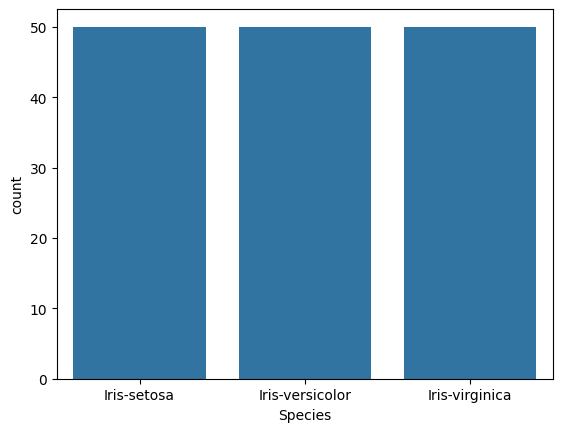

In [ ]:
sns.countplot(x='Species',data=df)

In [ ]:
x=df.iloc[:,:-1].values
x

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [ ]:
y=df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegressor
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Accuray_score 1.0
Confusion [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
classification                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



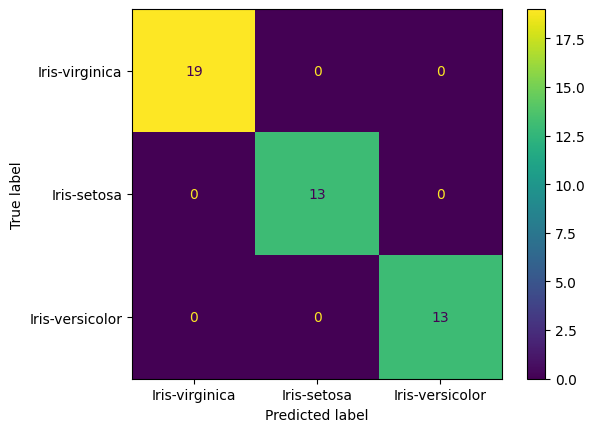

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
print("Accuray_score",accuracy_score(y_pred,y_test))
print("Confusion",confusion_matrix(y_pred,y_test))
print("classification",classification_report(y_pred,y_test))
lab=['Iris-virginica','Iris-setosa','Iris-versicolor'] # basod on training data order
cmd=ConfusionMatrixDisplay(cm,display_labels=lab)
cmd.plot()


[Text(0.6, 0.8333333333333334, 'SepalLengthCm <= 0.521\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]\nclass = Iris-setosa'),
 Text(0.4, 0.5, 'PetalWidthCm <= -0.83\nentropy = 0.994\nsamples = 68\nvalue = [31, 37, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Iris-virginica'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Iris-setosa'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = Iris-versicolor'),
 Text(0.7, 0.6666666666666667, '  False')]

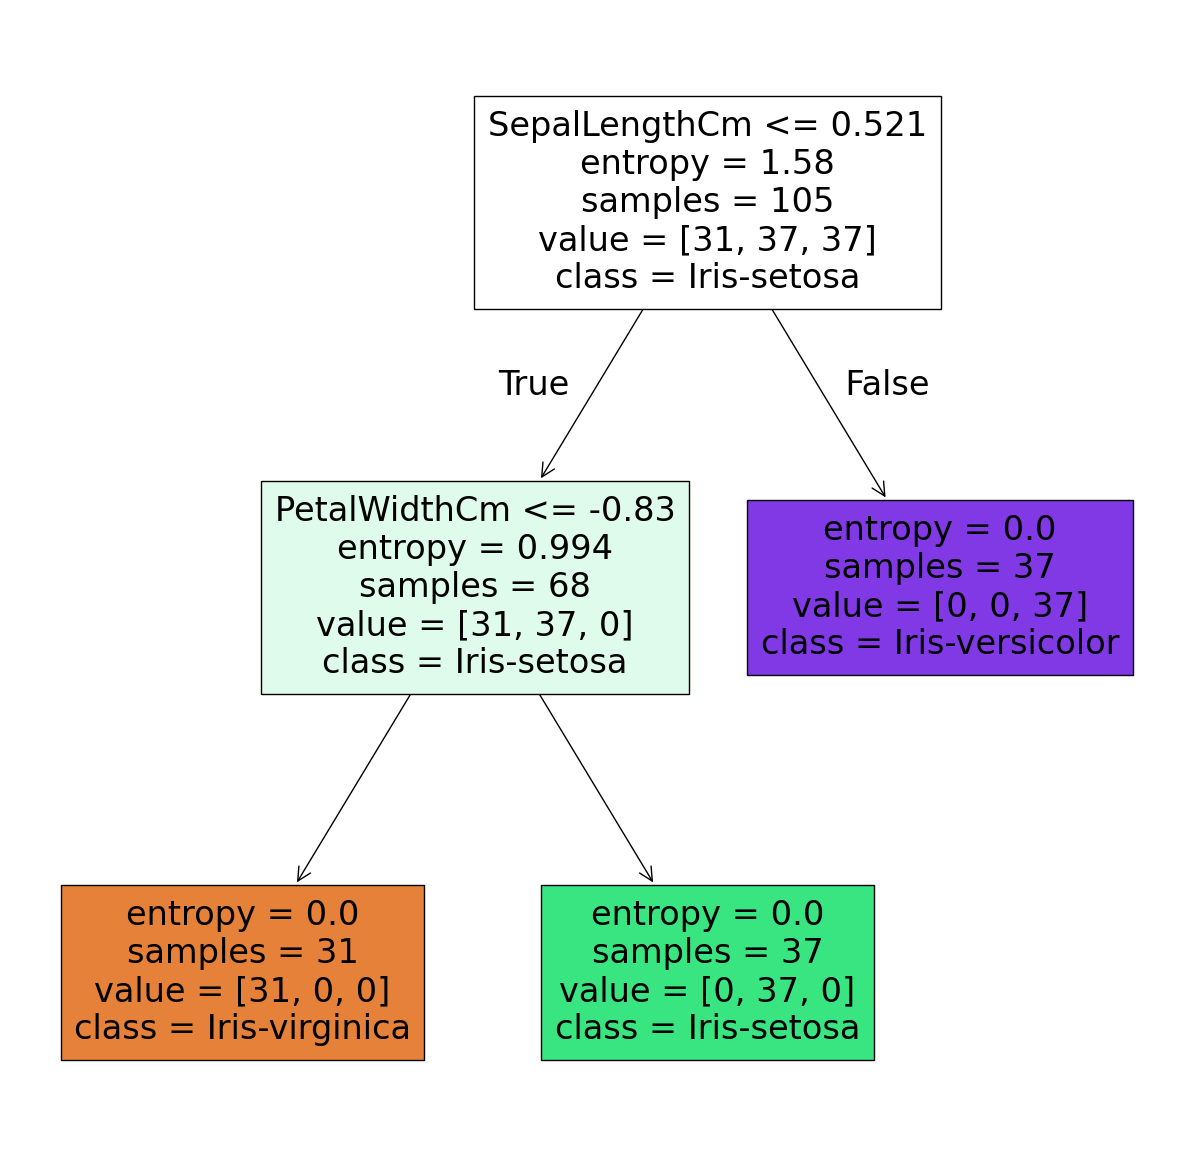

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],class_names=['Iris-virginica','Iris-setosa','Iris-versicolor'],filled=True) #filled is given for color